In [1]:
# importing of the necessary libraries for the classification model
import os
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  #for visualisation
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [2]:
# setting thee iamge size and batch size for the model
batch_size = 20
img_height = 180
img_width = 180

In [4]:
# data path
data_path = r"C:\Users\Emma\Desktop\New model-data\data-source"
# reading the data into one location named dataSet
train_ds = tf.keras.utils.image_dataset_from_directory(  
    data_path,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 194 files belonging to 3 classes.
Using 156 files for training.


In [5]:
val_Data = tf.keras.utils.image_dataset_from_directory(
    data_path,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)



Found 194 files belonging to 3 classes.
Using 38 files for validation.


In [6]:

class_names = train_ds.class_names
print(class_names)

['ripe', 'unripe', 'very ripe']


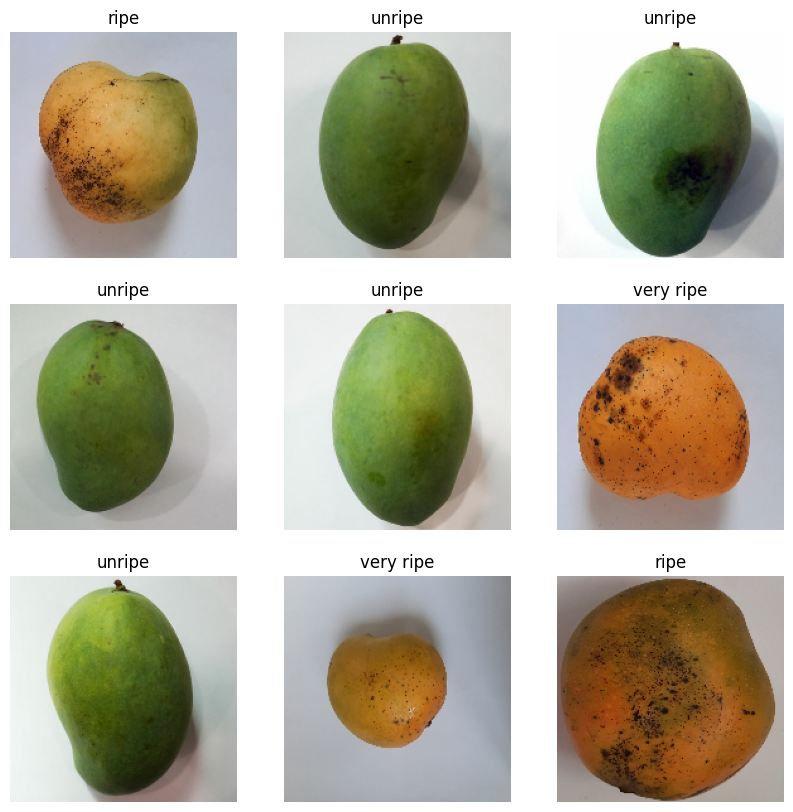

In [7]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [8]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(20, 180, 180, 3)
(20,)


In [9]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_Data.cache().prefetch(buffer_size=AUTOTUNE)

In [10]:
normalization_layer = layers.Rescaling(1./255)

normalised_ds = train_ds.map(lambda x,y:(normalization_layer(x),y))

image_batch,labels_batch =next(iter(normalised_ds))

first_image = image_batch[0]

print(np.min(first_image),np.max(first_image))

0.0 0.9275419


In [11]:
num_classes = len(class_names)

model = Sequential([
  # data_augmentation,
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, (3,3), padding='same', activation='relu'),
  layers.MaxPooling2D((2,2)),
  layers.Conv2D(32, (3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(2,2),
  layers.Conv2D(64, (3,3), padding='same', activation='relu'),
  layers.MaxPooling2D(2,2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(3 ,name= "outputs")
])

C:\Users\Emma\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [13]:
# displaying the architecture of the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ outputs (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,989,027 (15.22 MB)

 Trainable params: 3,989,027 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
epochs=12
history = model.fit(
  train_ds,
  validation_data=val_Data,
  epochs=epochs
)

Epoch 1/12
8/8 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.4274 - loss: 1.2785 - val_accuracy: 0.8684 - val_loss: 0.7082
Epoch 2/12
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.9125 - loss: 0.5248 - val_accuracy: 0.8158 - val_loss: 0.3139
Epoch 3/12
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.8269 - loss: 0.3244 - val_accuracy: 0.9474 - val_loss: 0.1287
Epoch 4/12
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.9519 - loss: 0.1609 - val_accuracy: 0.9737 - val_loss: 0.0904
Epoch 5/12
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.9763 - loss: 0.0773 - val_accuracy: 0.9474 - val_loss: 0.1301
Epoch 6/12
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.9818 - loss: 0.0794 - val_accuracy: 0.9474 - val_loss: 0.1785
Epoch 7/12
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.9571 - loss: 0.1013 - val_accuracy: 0.9474 - val_loss: 0.1333
Epoch 8/12
8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.9937 - loss: 0.0347 - val_accuracy: 0.9737 - val_loss: 0.0894
Epoch 9/

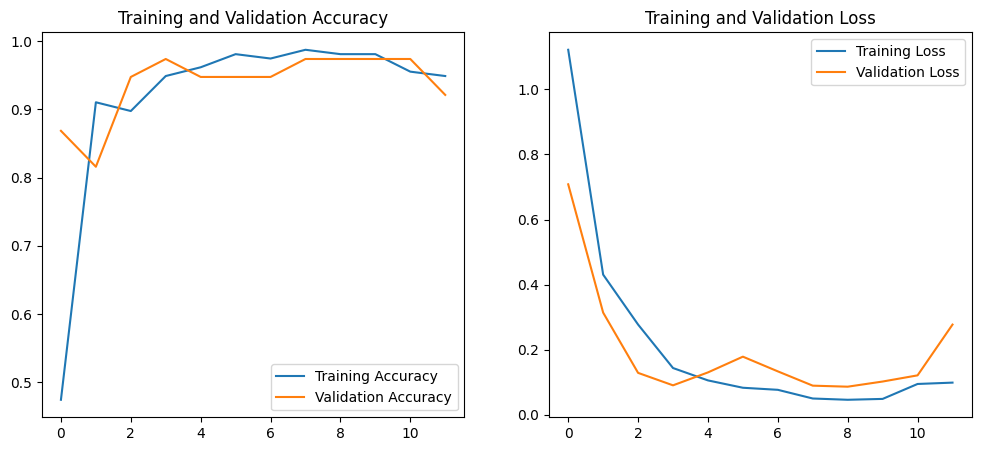

In [15]:
# plotting the results of the training
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [16]:
# saving the model 
model.save("fruit_model_new.h5")

In [17]:
# loading the model 
new_model = tf.keras.models.load_model("fruit_model_new.h5")

In [18]:

mango_path = r"C:\Users\Emma\Desktop\DATAMANGO\images\very ripe\20240519_131228.jpg"


img = tf.keras.utils.load_img(
    mango_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = new_model.predict(img_array)
score = tf.nn.softmax(predictions[0])
print(predictions,score)

print(
    "This image most likely belongs to {} with a {:.2f} % percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 603ms/step
[[  4.0046487 -15.9910555  13.469187 ]] tf.Tensor([7.7547797e-05 1.6052588e-13 9.9992239e-01], shape=(3,), dtype=float32)
This image most likely belongs to very ripe with a 99.99 % percent confidence.


In [19]:
converter = tf.lite.TFLiteConverter.from_keras_model(new_model)
tflite_model = converter.convert()
# saving the model
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\Emma\AppData\Local\Temp\tmprcv_g6qs\assets


INFO:tensorflow:Assets written to: C:\Users\Emma\AppData\Local\Temp\tmprcv_g6qs\assets


: 